In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from windrose import WindroseAxes
import matplotlib.colors as mcolors
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['path.simplify']    = True
plt.rcParams['font.family']  = 'monospace'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 3    
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# adding grid
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['path.simplify']    = True
plt.rcParams['font.family']  = 'monospace'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 3    
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# adding grid
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5

In [3]:
def calculate_wind_direction(u, v):
    wind_dir = (270-np.rad2deg(np.arctan2(v, u)))%360

    return wind_dir

In [4]:
df = pd.read_csv("../../data/processed/ERA5_Single_Level.csv")
df = df[['time', 'u10', 'v10', 'u100', 'v100']]
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

df['ws10'] = np.sqrt(df.u10**2 + df.v10**2)
df['wd10'] = calculate_wind_direction(df.u10, df.v10)

df['ws100'] = np.sqrt(df.u100**2 + df.v100**2)
df['wd100'] = calculate_wind_direction(df.u100, df.v100)

df.head()

,u10,v10,u100,v100,ws10,wd10,ws100,wd100
time,,,,,,,,
1998-12-31 21:00:00,-1.475597,0.648034,-2.811511,1.009022,1.611625,113.709528,2.987092,109.742543
1998-12-31 22:00:00,-1.384500,-0.232797,-2.811511,-0.376840,1.403935,80.455267,2.836653,82.365873
1998-12-31 23:00:00,-0.960242,-0.927978,-2.811511,-1.950172,1.335368,45.978942,3.421661,55.253335
1999-01-01 00:00:00,-0.514787,-1.210370,0.348545,-2.980013,1.315296,23.040719,3.000327,353.328937
1999-01-01 01:00:00,-0.089466,-1.281291,0.348545,-3.089207,1.284411,3.994190,3.108807,353.562724


In [5]:
df['hour'] = df.index.hour
# day or night
df['cycle'] = np.where((df.hour >= 6) & (df.hour <= 18), 'day', 'night')

df['month'] = df.index.month
# season summer, fall, winter, spring
df['season'] = df.month.apply(lambda x: 'summer' if x in [1, 2, 12] else 'fall' if x in [3, 4, 5] else 'winter' if x in [6, 7, 8] else 'spring')

df.head()

,u10,v10,u100,v100,ws10,wd10,ws100,wd100,hour,cycle,month,season
time,,,,,,,,,,,,
1998-12-31 21:00:00,-1.475597,0.648034,-2.811511,1.009022,1.611625,113.709528,2.987092,109.742543,21,night,12,summer
1998-12-31 22:00:00,-1.384500,-0.232797,-2.811511,-0.376840,1.403935,80.455267,2.836653,82.365873,22,night,12,summer
1998-12-31 23:00:00,-0.960242,-0.927978,-2.811511,-1.950172,1.335368,45.978942,3.421661,55.253335,23,night,12,summer
1999-01-01 00:00:00,-0.514787,-1.210370,0.348545,-2.980013,1.315296,23.040719,3.000327,353.328937,0,night,1,summer
1999-01-01 01:00:00,-0.089466,-1.281291,0.348545,-3.089207,1.284411,3.994190,3.108807,353.562724,1,night,1,summer


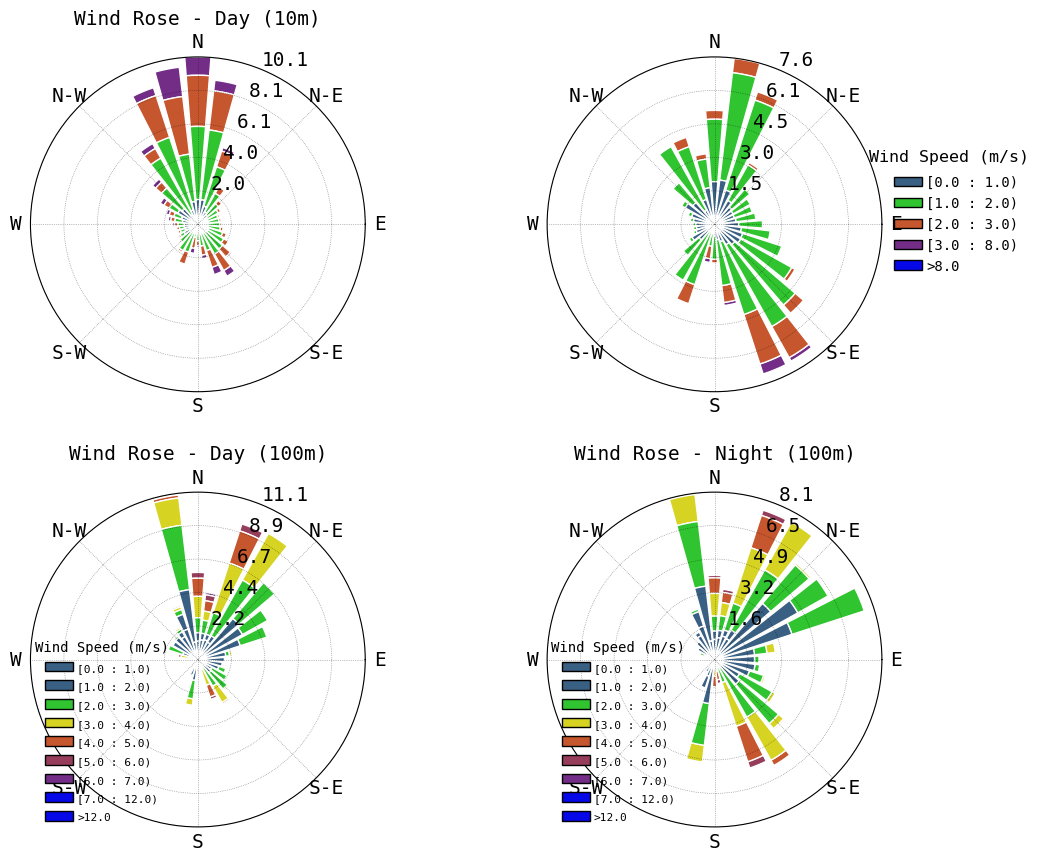

In [71]:
day_10m = df[(df['cycle'] == 'day')]
night_10m = df[(df['cycle'] == 'night')]
day_100m = df[(df['cycle'] == 'day')]
night_100m = df[(df['cycle'] == 'night')]

max_wind_speed = max(day_10m['ws10'].max(), night_10m['ws10'].max())
bin_size = 1  # Define your bin size
bins = np.arange(0, max_wind_speed + bin_size, bin_size)
bins = [*bins[:-5], bins[-1]]

new_labels = ["E", "N-E", "N", "N-W", "W", "S-W", "S", "S-E"]

# Create subplots with the same scale
fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw=dict(projection='windrose'))
colors = [
    '#395F83',
    '#30C430',
    '#D6D322',
    '#C6562E',
    '#963D5B',
    '#732D86',
    '#0608E7'
]

cmap = mcolors.ListedColormap(colors)

# Plot wind rose for the day dataset at 10m
axs[0, 0].bar(day_10m['wd10'], day_10m['ws10'], bins=bins, normed=True, opening=0.8, edgecolor='white', cmap=cmap, nsector=32)
# remove the legend
axs[0, 0].legend().set_visible(False)
axs[0, 0].set_title("Wind Rose - Day (10m)", fontsize=14)


# Plot wind rose for the night dataset at 10m
axs[0, 1].bar(night_10m['wd10'], night_10m['ws10'], bins=bins, normed=True, opening=0.8, edgecolor='white', cmap=cmap, nsector=32)

# move the legend to the right and center of second subplot
axs[0, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# add text annotation for the legend
axs[0, 1].text(1.2, 0.70, "m/s (10m)", fontsize=12, ha='center', va='center', rotation=0, transform=axs[0, 1].transAxes)

max_wind_speed = max(day_100m['ws100'].max(), night_100m['ws100'].max())
bin_size = 1  # Define your bin size
bins = np.arange(0, max_wind_speed + bin_size, bin_size)
bins = [*bins[:-5], bins[-1]]

# Plot wind rose for the day dataset at 100m
axs[1, 0].bar(day_100m['wd100'], day_100m['ws100'], bins=bins, normed=True, opening=0.8, edgecolor='white', cmap=cmap, nsector=32)
# remove the legend
axs[1, 0].legend().set_visible(False)
axs[1, 0].set_legend(title="Wind Speed (m/s)")
axs[1, 0].set_title("Wind Rose - Day (100m)", fontsize=14)

# Plot wind rose for the night dataset at 100m
axs[1, 1].bar(night_100m['wd100'], night_100m['ws100'], bins=bins, normed=True, opening=0.8, edgecolor='white', cmap=cmap, nsector=32)
# remove the legend
axs[1, 1].legend().set_visible(False)
axs[1, 1].set_legend(title="Wind Speed (m/s)")
axs[1, 1].set_title("Wind Rose - Night (100m)", fontsize=14)


plt.subplots_adjust(hspace=0.3, wspace=-0.2)

In [44]:
help(axs[0, 0].bar)

Help on method bar in module windrose.windrose:

bar(direction, var, **kwargs) method of windrose.windrose.WindroseAxes instance
    Plot a windrose in bar mode. For each var bins and for each sector,
    a colored bar will be draw on the axes.

    Parameters
    ----------
    direction : 1D array
        directions the wind blows from, North centred
    var : 1D array
        values of the variable to compute. Typically the wind speeds.

    Other Parameters
    ----------------
    nsector : integer, optional
        number of sectors used to compute the windrose table. If not set,
        nsector=16, then each sector will be 360/16=22.5°, and the
        resulting computed table will be aligned with the cardinals points.
    bins : 1D array or integer, optional
        number of bins, or a sequence of bins variable. If not set, bins=6
        between min(`var`) and max(`var`).
    blowto : bool, optional.
        if True, the windrose will be pi rotated, to show where the wind
   